### EIS Instrumental Width: Reading IDL Data and Comparing with Python Implementation


This notebook reads the EIS instrumental width data computed by the IDL `eis_slit_width` function,
plots it, implements the function in Python, and compares the results with IDL.

For details, refer to the EIS software note 07

In [ ]:
# reading IDL sav file from eis_slit_width.pro 
from scipy.io import readsav

sav_data = readsav('/Users/andysh.to/Script/Python_Script/Tutorials/EISPAC Instrumental Width/eis_width.sav')

width_0 = sav_data['out_width_0']
width_2 = sav_data['out_width_2']


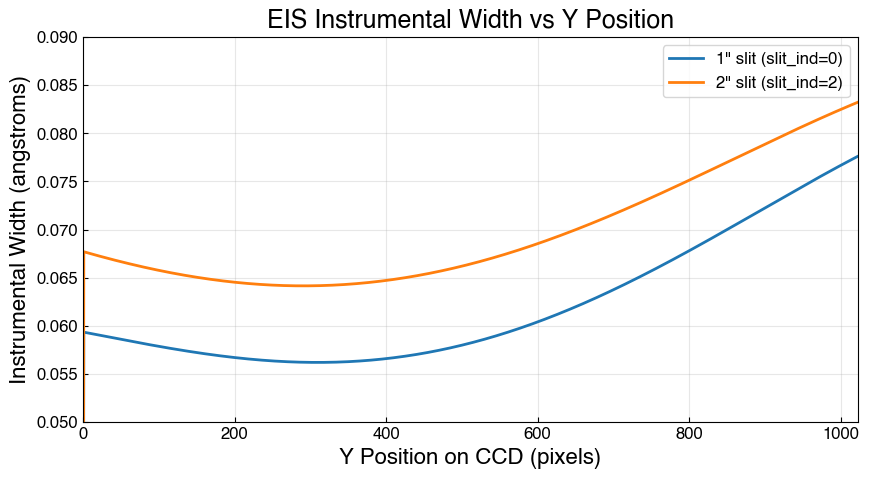

In [14]:
import matplotlib.pyplot as plt

# Plot the instrumental width data
plt.figure(figsize=(10, 5))
plt.plot(width_0, label='1" slit (slit_ind=0)', linewidth=2)
plt.plot(width_2, label='2" slit (slit_ind=2)', linewidth=2)
plt.xlabel('Y Position on CCD (pixels)')
plt.ylabel('Instrumental Width (angstroms)')
plt.title('EIS Instrumental Width vs Y Position')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1023)
plt.ylim(0.05, 0.09)
plt.show()


Define Python function that describes the eis instrumental width (direct copy from the eis_slit_width.pro routine)

In [15]:
import numpy as np

def eis_slit_width(yip, slit_ind=None):
    """
    Returns the EIS instrumental width for the user-specified Y-position on the CCD.
    
    The method for determining the instrumental width is described in EIS Software Note #7.
    
    Parameters
    ----------
    yip : int, float, or array-like
        The Y-position on the EIS CCD. Must be a number between 1 and 1023.
    
    slit_ind : int, optional
        The index of the EIS slit. slit_ind=0 corresponds to the 1" slit (default),
        and slit_ind=2 corresponds to the 2" slit.
    
    Returns
    -------
    result : float or ndarray
        The instrumental width (full width at half maximum) in angstroms.
        Returns a value/array of same size as the input yip.
    
    History
    -------
    Ver. 0.1, 28-Feb-2011, Peter Young
    Ver. 1.0, 6-Sep-2012, Peter Young - Tidied up header; added checks on input parameters.
    Ver. 1.1, 8-Jan-2013, Peter Young - Corrected error in header; no change to code.
    Python translation by user.
    """
    
    # Handle default slit_ind
    if slit_ind is None:
        slit_ind = 0
        print('%EIS_SLIT_WIDTH: The slit index (slit_ind) has not been specified. '
              'Assuming slit_ind=0, corresponding to 1" slit.')
    
    # Validate slit_ind
    if slit_ind not in [0, 2]:
        print('%EIS_SLIT_WIDTH: The slit index (slit_ind) must be either 0 or 2. Returning...')
        return -1
    
    # A 4 degree polynomial was used to fit the width variation.
    # The coefficients of the polynomial are defined below.
    if slit_ind == 0:
        c = [0.059358, -1.5094e-5, -5.6848e-9, 8.3517e-11, -4.5428e-14]
    else:  # slit_ind == 2
        c = [0.067721, -2.2514e-5, 2.5833e-8, 4.0998e-11, -2.9560e-14]
    
    # Evaluate polynomial: C0 + C1*x + C2*x^2 + ...
    # np.polyval expects coefficients in descending order, so we reverse c
    result = np.polyval(c[::-1], yip)
    
    return result



Plot and compare between IDL and Python

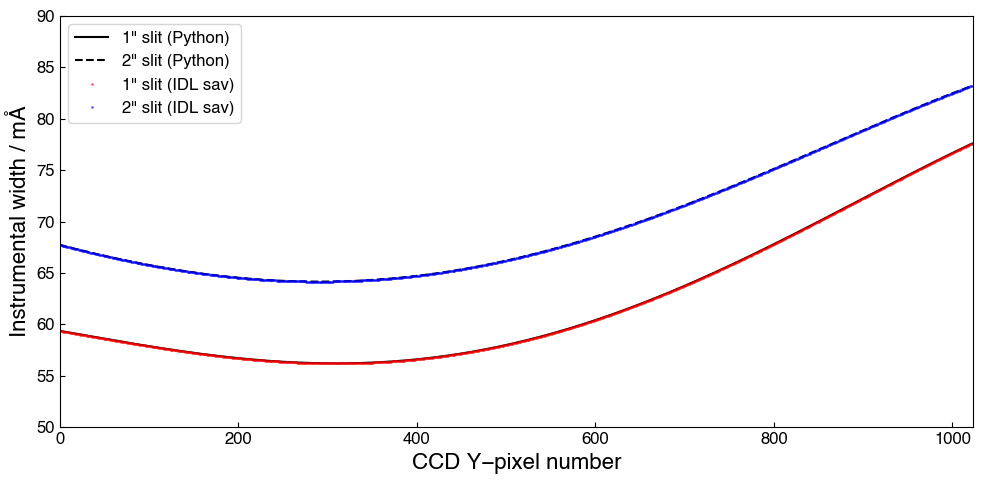

In [16]:

import matplotlib.pyplot as plt
import numpy as np

# Generate y-pixel values from 0 to 1000
yip = np.arange(0, 1023)

# Calculate instrumental widths using the eis_slit_width function
width_1as = eis_slit_width(yip, slit_ind=0)  # 1" slit (solid line)
width_2as = eis_slit_width(yip, slit_ind=2)  # 2" slit (dashed line)

# Convert from Angstroms to milli-Angstroms (multiply by 1000)
width_1as_mA = width_1as * 1000
width_2as_mA = width_2as * 1000

# Convert sav file values to milli-Angstroms
width_0_mA = width_0 * 1000
width_2_mA = width_2 * 1000

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot 1" slit as solid line
ax.plot(yip, width_1as_mA, 'k-', linewidth=1.5, label='1" slit (Python)')

# Plot 2" slit as dashed line
ax.plot(yip, width_2as_mA, 'k--', linewidth=1.5, label='2" slit (Python)')

# Overlay sav file values
ax.plot(yip, width_0_mA, 'r.', markersize=2, alpha=0.5, label='1" slit (IDL sav)')
ax.plot(yip, width_2_mA, 'b.', markersize=2, alpha=0.5, label='2" slit (IDL sav)')

# Set axis limits
ax.set_xlim(0, 1023)
ax.set_ylim(50, 90)

# Set axis labels
ax.set_xlabel('CCD Y−pixel number')
ax.set_ylabel('Instrumental width / mÅ')

# Set y-axis ticks
ax.set_yticks([50, 55, 60, 65, 70, 75, 80, 85, 90])

# Add legend
ax.legend()

plt.tight_layout()
plt.show()
